## The problem statement: With Given data of India domestic flights of 2019, create a model to predicts the fare.

In [684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [478]:
original = pd.read_excel(r'C:\Users\win10\Downloads\Flight_data.xlsx')

In [479]:
original

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [480]:
df = original.copy()

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [482]:
 df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [483]:
df.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [484]:
df = df.dropna()


In [485]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Feature engineering

In [487]:
df['Total_Stops'] = df['Total_Stops'].str.split(" ").str[0]

# alternat way == df['Total_Stops'].str.extract(r'(\d+)') with regex


In [488]:
df['Arrival_Time'] = df['Arrival_Time'].str[0:5]   # extracting time portion only

In [489]:
df['Duration'].nunique()

368

In [490]:
hr = df['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)

min = df['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)

In [491]:
hr.isnull().sum()

0    0
dtype: int64

In [492]:
min.isnull().sum()  

0    0
dtype: int64

In [493]:
hr = hr*60  # converting hours to minutes

In [494]:
df['Duration_min'] = hr + min

In [495]:
df.drop('Duration',axis = 1, inplace = True)

In [496]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,2,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302,285
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,non-stop,No info,4107,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,non-stop,No info,4145,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,non-stop,No info,7229,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,non-stop,No info,12648,160


In [497]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],errors = 'coerce',dayfirst = True)

In [498]:
df['month'] = df['Date_of_Journey'].dt.month
df['year'] = df['Date_of_Journey'].dt.year
df['year_month'] = df['Date_of_Journey'].dt.strftime("%Y-%m")

In [499]:
df.drop('Route',axis = 1,inplace = True)
df.drop('Additional_Info',axis = 1,inplace = True)

In [500]:
df['Total_Stops'] = np.where(df['Total_Stops']=='non-stop',0,df['Total_Stops']).astype(int)

df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Dep_Time         10682 non-null  object        
 5   Arrival_Time     10682 non-null  object        
 6   Total_Stops      10682 non-null  int32         
 7   Price            10682 non-null  int64         
 8   Duration_min     10682 non-null  int32         
 9   month            10682 non-null  int32         
 10  year             10682 non-null  int32         
 11  year_month       10682 non-null  object        
dtypes: datetime64[ns](1), int32(4), int64(1), object(6)
memory usage: 918.0+ KB


In [502]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time'],format = '%H:%M').dt.hour
df['arr_hour'] = pd.to_datetime(df['Arrival_Time'],format = '%H:%M').dt.hour

In [503]:
df['Day_of_Journey'] = df['Date_of_Journey'].dt.strftime('%w').astype(int)  #  0 is Sunday and 6 is Saturday.
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Duration_min,month,year,year_month,Dep_hour,arr_hour,Day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,0,3897,170,3,2019,2019-03,22,1,0
1,Air India,2019-05-01,Kolkata,Banglore,05:50,13:15,2,7662,445,5,2019,2019-05,5,13,3
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,04:25,2,13882,1140,6,2019,2019-06,9,4,0
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,23:30,1,6218,325,5,2019,2019-05,18,23,0
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50,21:35,1,13302,285,3,2019,2019-03,16,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,19:55,22:25,0,4107,150,4,2019,2019-04,19,22,2
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,0,4145,155,4,2019,2019-04,20,23,6
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,0,7229,180,4,2019,2019-04,8,11,6
10681,Vistara,2019-03-01,Banglore,New Delhi,11:30,14:10,0,12648,160,3,2019,2019-03,11,14,5


In [504]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis = 1,inplace =True)
df

,Airline,Source,Destination,Total_Stops,Price,Duration_min,month,year,year_month,Dep_hour,arr_hour,Day_of_Journey
0,IndiGo,Banglore,New Delhi,0,3897,170,3,2019,2019-03,22,1,0
1,Air India,Kolkata,Banglore,2,7662,445,5,2019,2019-05,5,13,3
2,Jet Airways,Delhi,Cochin,2,13882,1140,6,2019,2019-06,9,4,0
3,IndiGo,Kolkata,Banglore,1,6218,325,5,2019,2019-05,18,23,0
4,IndiGo,Banglore,New Delhi,1,13302,285,3,2019,2019-03,16,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,150,4,2019,2019-04,19,22,2
10679,Air India,Kolkata,Banglore,0,4145,155,4,2019,2019-04,20,23,6
10680,Jet Airways,Banglore,Delhi,0,7229,180,4,2019,2019-04,8,11,6
10681,Vistara,Banglore,New Delhi,0,12648,160,3,2019,2019-03,11,14,5


In [505]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [506]:
df['Destination'] = np.where(df['Destination']=='New Delhi','Delhi',df['Destination']) # replacing newdelhi with delhi

df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Airline'>

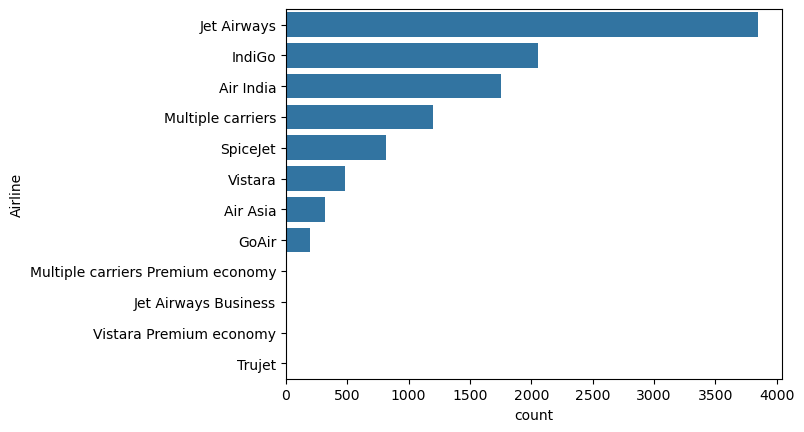

In [507]:
sns.barplot(df['Airline'].value_counts(),orient="h")

### There is no point keeping premium economy or business class fares as it may confuse the model

In [509]:
not_req = df[(df['Airline']=='Multiple carriers Premium economy') | (df['Airline']=='Jet Airways Business')
        | (df['Airline']=='Vistara Premium economy')| (df['Airline']=='Trujet')| (df['Airline']=='Multiple carriers')].index
print(not_req.shape)

df.drop(not_req,inplace = True)

(1219,)


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         9463 non-null   object
 1   Source          9463 non-null   object
 2   Destination     9463 non-null   object
 3   Total_Stops     9463 non-null   int32 
 4   Price           9463 non-null   int64 
 5   Duration_min    9463 non-null   int32 
 6   month           9463 non-null   int32 
 7   year            9463 non-null   int32 
 8   year_month      9463 non-null   object
 9   Dep_hour        9463 non-null   int32 
 10  arr_hour        9463 non-null   int32 
 11  Day_of_Journey  9463 non-null   int32 
dtypes: int32(7), int64(1), object(4)
memory usage: 702.3+ KB


<Axes: xlabel='count', ylabel='Airline'>

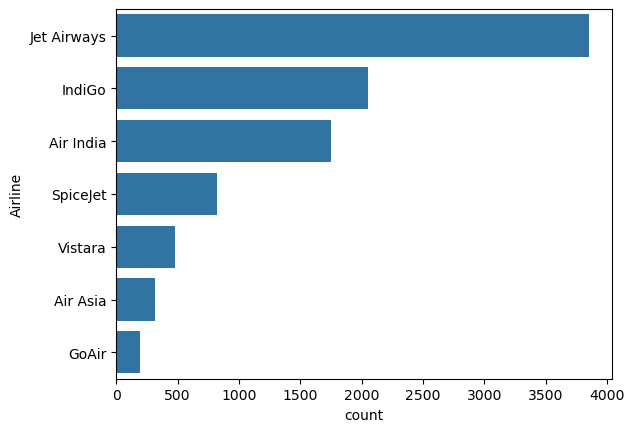

In [511]:
sns.barplot(df['Airline'].value_counts(),orient="h")

### Jet airways, indigo and air india contributes the most as per the count

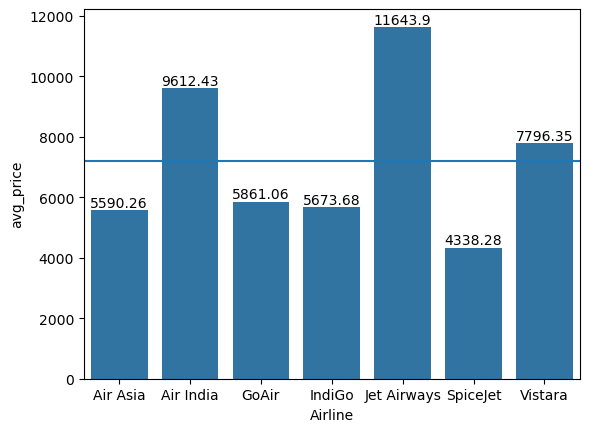

In [513]:
air_price = df.groupby(['Airline'])['Price'].mean()

ax = sns.barplot(air_price)
plt.axhline(air_price.mean()) # generating avg line
plt.ylabel('avg_price')
for container in ax.containers:
    ax.bar_label(container)


### considering the average price, Air india, jet airways and vistara are above the average price. It clearly shows that FULL COST CARRIERS charge more than LOW COST CARRIERS

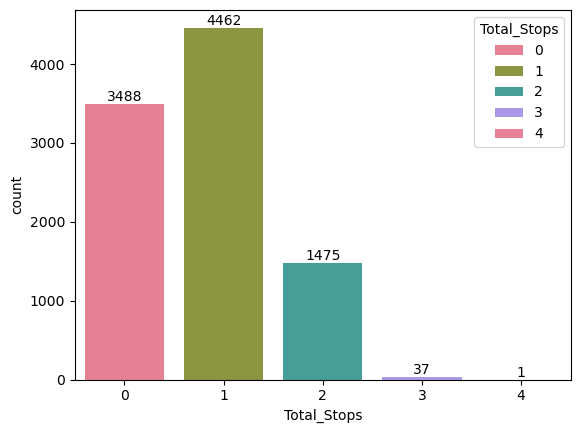

In [515]:
ax = sns.countplot(data = df, x = 'Total_Stops',hue = 'Total_Stops',palette='husl')

for container in ax.containers:
    ax.bar_label(container)



### people prefer taking non-stop flights or max one-stop flight.

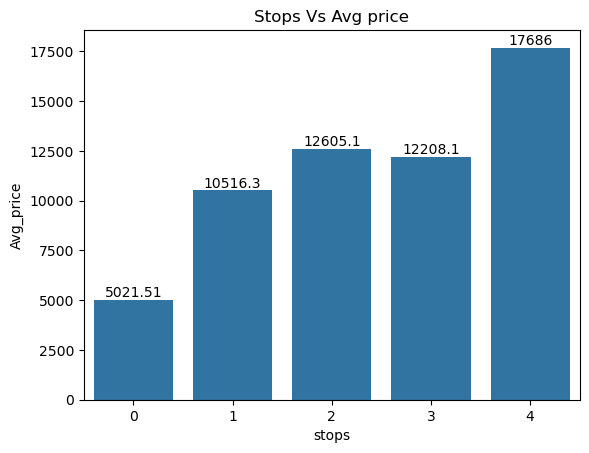

In [517]:
stop_price = df.groupby(['Total_Stops'])['Price'].mean()

ax = sns.barplot(stop_price)
plt.xlabel('stops')
plt.ylabel('Avg_price')
plt.title('Stops Vs Avg price')
for container in ax.containers:
    ax.bar_label(container)

### Contrary to popular belief, price for non-stop is less and it keeps on increasing as the number of stops increase.

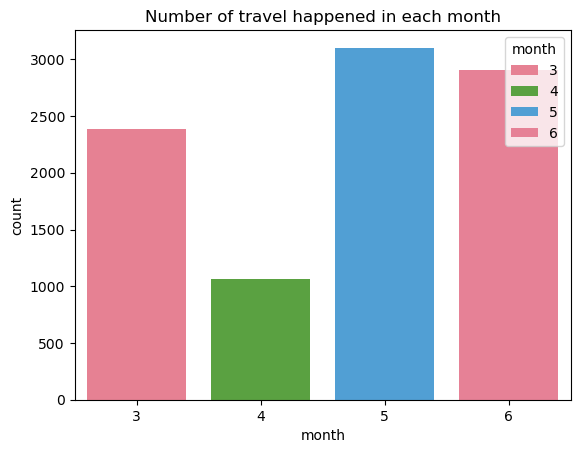

In [519]:
sns.countplot(data = df,x = 'month', hue = 'month',palette = 'husl')
plt.title('Number of travel happened in each month')
plt.show()

### The data is only available for 4 months however it seems like more people travel in the month on May & June because of summer vacation.


Text(0.5, 1.0, 'Avg price spent in each month')

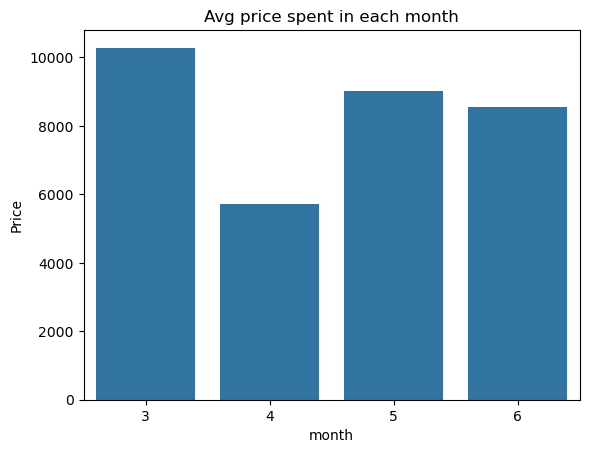

In [521]:
x = df.groupby('month')['Price'].mean()
sns.barplot(x)
plt.title('Avg price spent in each month')

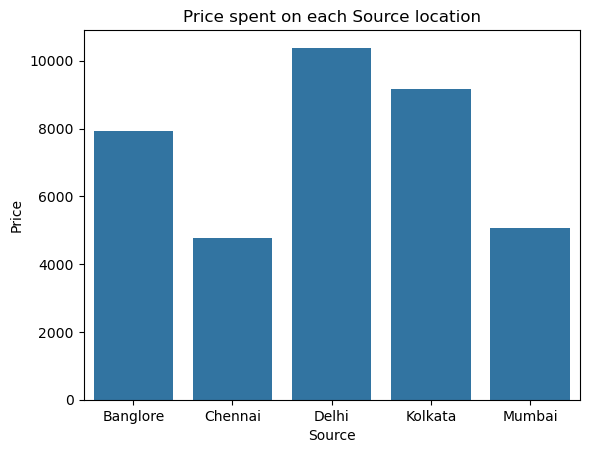

In [522]:
x = df.groupby('Source')['Price'].mean().reset_index()
sns.barplot(data = x, x = 'Source', y='Price')
plt.title('Price spent on each Source location')
plt.show()

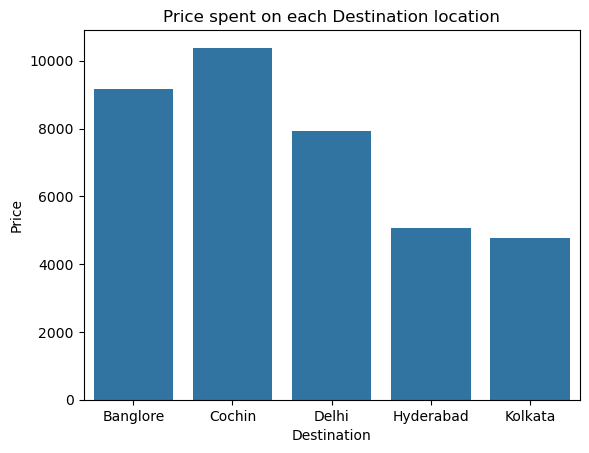

In [523]:
x = df.groupby('Destination')['Price'].mean().reset_index()
sns.barplot(data = x, x = 'Destination', y='Price')
plt.title('Price spent on each Destination location')
plt.show()

## Max amount is spent FROM and TO Delhi flights


<Axes: >

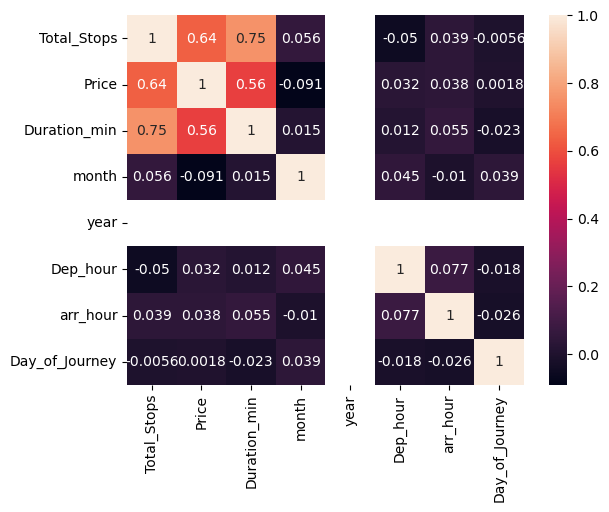

In [525]:
sns.heatmap(df.corr(numeric_only = True),annot=True)

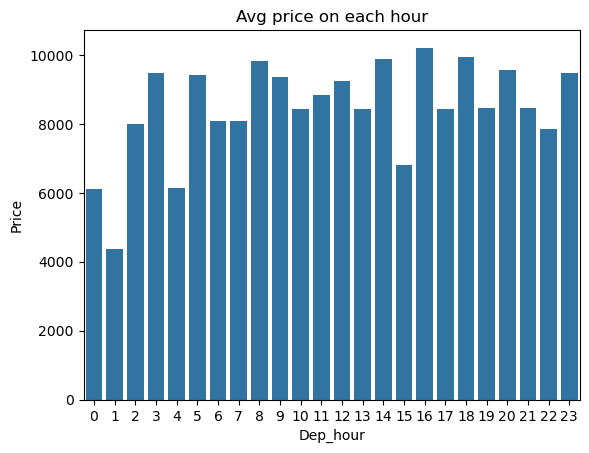

In [526]:
hr_price = df.groupby('Dep_hour')['Price'].mean()
sns.barplot(hr_price)
plt.title('Avg price on each hour')
plt.show()


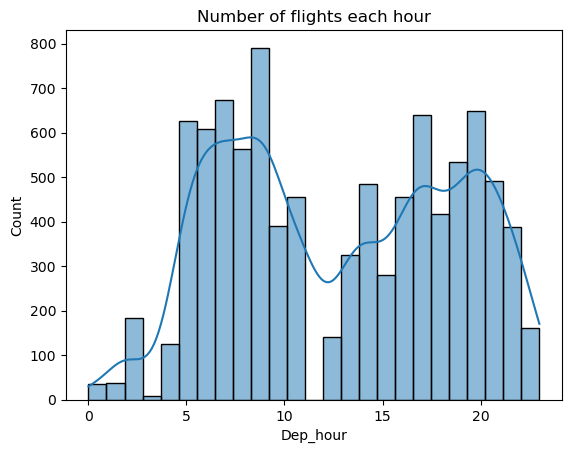

In [527]:
sns.histplot(df,x = 'Dep_hour',kde = True,)
plt.title('Number of flights each hour')
plt.show()

### people prefer taking flights from 05AM to 10AM or 05PM to 08PM flights more.

0 is Sunday and 6 is Saturday.


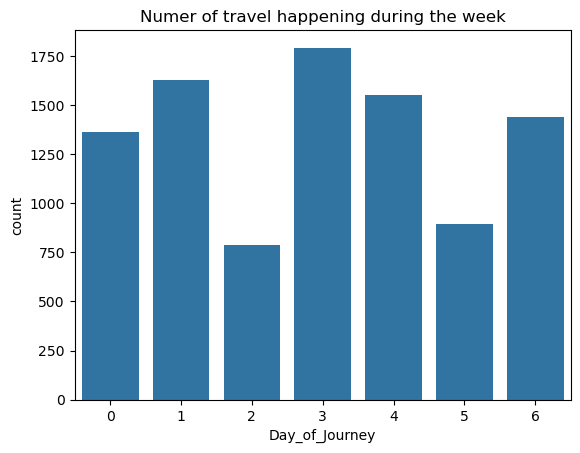

In [529]:
sns.countplot(data = df,x = 'Day_of_Journey',order = [0,1,2,3,4,5,6])
plt.title('Numer of travel happening during the week')
print('0 is Sunday and 6 is Saturday.')
plt.show()


### the least number of travel happens on Tuesday and Friday.

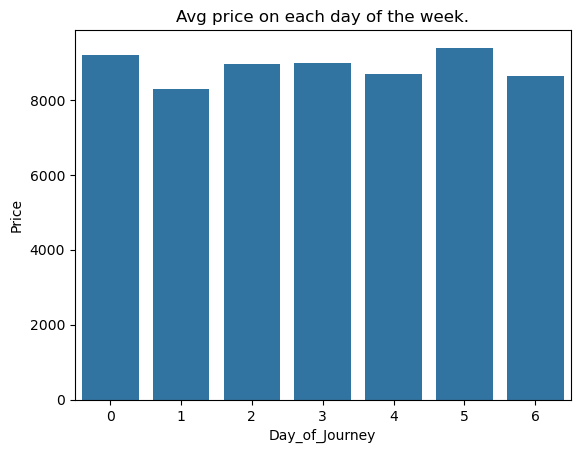

In [531]:
day_price = df.groupby('Day_of_Journey')['Price'].mean()
sns.barplot(day_price)
plt.title('Avg price on each day of the week.')
plt.show()


<Axes: xlabel='Duration_min', ylabel='Count'>

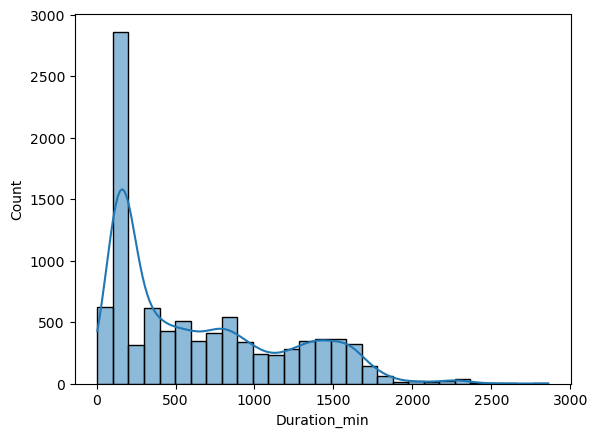

In [532]:
sns.histplot(data = df,x = 'Duration_min',binwidth = 100, kde = True )

### Maximum flights are having a duration of 100-200 Min range.

<Axes: xlabel='Duration_min', ylabel='Count'>

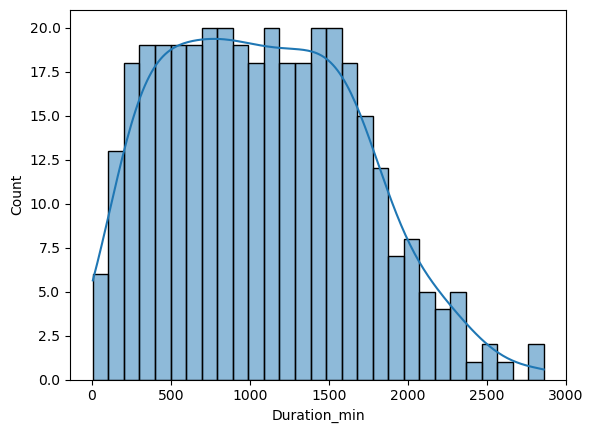

In [534]:
x = df.groupby('Duration_min')['Price'].mean().reset_index()

sns.histplot(data = x,x = 'Duration_min', kde = True,binwidth = 100)

In [535]:
df[df['Duration_min']==df['Duration_min'].max()]

,Airline,Source,Destination,Total_Stops,Price,Duration_min,month,year,year_month,Dep_hour,arr_hour,Day_of_Journey
10456,Jet Airways,Delhi,Cochin,2,20694,2860,3,2019,2019-03,19,18,3


<Axes: xlabel='Price', ylabel='Count'>

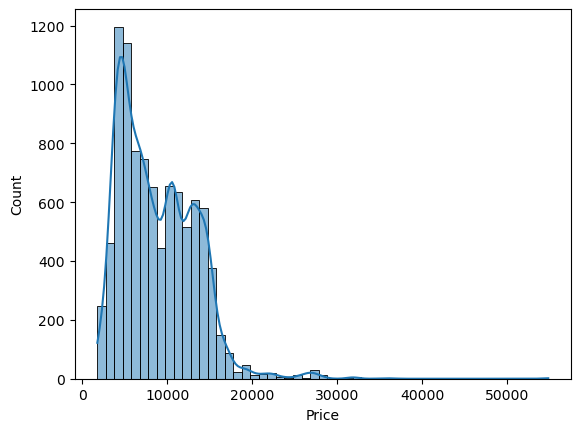

In [536]:
sns.histplot(df['Price'],binwidth = 1000,kde = True)

### Majority of flights cost is between 3000 to 15000

Text(0.5, 1.0, 'Log-transformed price')

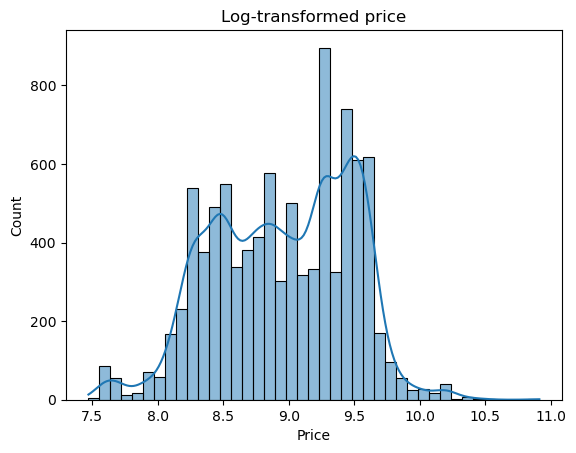

In [538]:
sns.histplot(np.log(df['Price']),kde = True)
plt.title('Log-transformed price')

In [539]:
df[df['Price'] == df['Price'].max()]

,Airline,Source,Destination,Total_Stops,Price,Duration_min,month,year,year_month,Dep_hour,arr_hour,Day_of_Journey
1478,Jet Airways,Banglore,Delhi,1,54826,365,3,2019,2019-03,18,0,1
2618,Jet Airways,Banglore,Delhi,1,54826,375,3,2019,2019-03,22,5,1
5439,Jet Airways,Banglore,Delhi,1,54826,365,3,2019,2019-03,16,23,5


### such high fare seems like an outlier

### Splitting data

In [542]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [543]:
x = df.drop(['Price','year','year_month'],axis = 1)
y = df['Price']

In [544]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [545]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

x_train['Airline'] = le1.fit_transform(x_train['Airline'])
x_train['Source'] = le2.fit_transform(x_train['Source'])
x_train['Destination'] = le3.fit_transform(x_train['Destination'])

x_test['Airline'] = le1.transform(x_test['Airline'])
x_test['Source'] = le2.transform(x_test['Source'])
x_test['Destination'] = le3.transform(x_test['Destination'])


In [546]:
x_test

,Airline,Source,Destination,Total_Stops,Duration_min,month,Dep_hour,arr_hour,Day_of_Journey
4622,1,2,1,2,1275,6,22,19,6
5978,4,3,0,1,750,5,9,22,2
5400,3,2,1,1,490,6,14,22,4
7956,5,1,4,0,135,5,8,10,5
6792,0,3,0,0,150,5,19,22,3
...,...,...,...,...,...,...,...,...,...
5787,3,2,1,1,315,5,7,12,4
9269,3,3,0,0,155,5,4,7,5
1021,0,0,2,0,165,3,23,2,0
7173,4,0,2,0,175,5,15,18,3


## MODEL BUILDING

In [548]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

ln = LinearRegression()
rd = Ridge()
ls = Lasso()
svr = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ad = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

In [549]:
algo = {'ln': ln,
        'rd':rd,
        'ls':ls,
        'svr':svr,
        'dt':dt,
        'rf':rf,
        'ad':ad,
        'gb':gb,
        'xgb':xgb}

In [550]:
 def performance(reg,x_train,y_train,x_test,y_test):
     reg.fit(x_train,y_train)
     y_pred = reg.predict(x_test)
     mse = mean_squared_error(y_pred,y_test)
     mae = mean_absolute_error(y_pred,y_test)
     return mse,mae    
     

In [551]:
final_rmse = []
final_mae = []
for reg in algo.values():
    mse,mae = performance(reg,x_train,y_train,x_test,y_test)
    final_rmse.append(np.sqrt(mse))
    final_mae.append(mae)
    
    

In [552]:
perf = (pd.DataFrame({'Algo':algo.keys(),'root_mean_sqrd_error': final_rmse,'mean_abs_error': final_mae}))

In [553]:
perf

,Algo,root_mean_sqrd_error,mean_abs_error
0,ln,3270.287704,2322.632892
1,rd,3270.303537,2322.646137
2,ls,3270.283452,2322.497440
3,svr,4109.036268,3111.970969
4,dt,3008.254871,1638.338778
5,rf,2454.820982,1438.301279
6,ad,3361.780964,2685.079573
7,gb,2482.488764,1602.099344
8,xgb,2316.511814,1379.254945


###  trying same models after min max scaler

In [555]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train_mm = mm.fit_transform(x_train)
x_test_mm = mm.transform(x_test)

In [556]:
final_rmse = []
final_mae = []
for reg in algo.values():
    mse,mae = performance(reg,x_train_mm,y_train,x_test_mm,y_test)
    final_rmse.append(np.sqrt(mse))
    final_mae.append(mae)
    

perf['rsme_mm'] = final_rmse
perf['mae_mm'] = final_mae

In [557]:
perf

,Algo,root_mean_sqrd_error,mean_abs_error,rsme_mm,mae_mm
0,ln,3270.287704,2322.632892,3270.287704,2322.632892
1,rd,3270.303537,2322.646137,3270.558282,2322.904838
2,ls,3270.283452,2322.497440,3270.269497,2322.147373
3,svr,4109.036268,3111.970969,4443.066906,3515.729086
4,dt,3008.254871,1638.338778,3044.369920,1641.867490
5,rf,2454.820982,1438.301279,2461.250998,1439.636802
6,ad,3361.780964,2685.079573,3421.487064,2781.392933
7,gb,2482.488764,1602.099344,2482.515620,1602.182112
8,xgb,2316.511814,1379.254945,2316.511814,1379.254945


### trying normalization

In [559]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.fit_transform(x_test)

In [560]:
final_rmse = []
final_mae = []
for reg in algo.values():
    mse,mae = performance(reg,x_train_norm,y_train,x_test_norm,y_test)
    final_rmse.append(np.sqrt(mse))
    final_mae.append(mae)
    

perf['rsme_norm'] = final_rmse
perf['mae_norm'] = final_mae

In [561]:
perf

,Algo,root_mean_sqrd_error,mean_abs_error,rsme_mm,mae_mm,rsme_norm,mae_norm
0,ln,3270.287704,2322.632892,3270.287704,2322.632892,3896.742545,2439.450661
1,rd,3270.303537,2322.646137,3270.558282,2322.904838,3584.316005,2630.394564
2,ls,3270.283452,2322.497440,3270.269497,2322.147373,3419.097089,2510.944083
3,svr,4109.036268,3111.970969,4443.066906,3515.729086,4551.347247,3638.930340
4,dt,3008.254871,1638.338778,3044.369920,1641.867490,3614.192474,1939.886862
5,rf,2454.820982,1438.301279,2461.250998,1439.636802,2787.829925,1625.317344
6,ad,3361.780964,2685.079573,3421.487064,2781.392933,4045.640230,3404.946302
7,gb,2482.488764,1602.099344,2482.515620,1602.182112,2817.929168,1863.370362
8,xgb,2316.511814,1379.254945,2316.511814,1379.254945,2733.576058,1591.846605


### XGB seems to give the best performance with non-scaled data
### lets try grid search CV on XGB

In [563]:
from sklearn.model_selection import GridSearchCV

In [564]:
par = {'n_estimators':[50,75,100,150,300,400,500],
      'max_depth':[4,5,6,7,9,12],
      'learning_rate': [0.01,0.1,0.5]}


regr = GridSearchCV(xgb,param_grid = par,cv = 5)

regr.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [4, 5, 6, 7, 9, 12],
                         'n_estimators': [50, 75, 100, 150, 300, 400, 500]})

In [565]:
regr.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}

In [566]:
model = XGBRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 50)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [567]:
mse = np.sqrt(mean_squared_error(pred,y_test))
mae = mean_absolute_error(pred,y_test)

In [568]:
print(mse,mae)

2238.4957346459664 1357.2597422506653


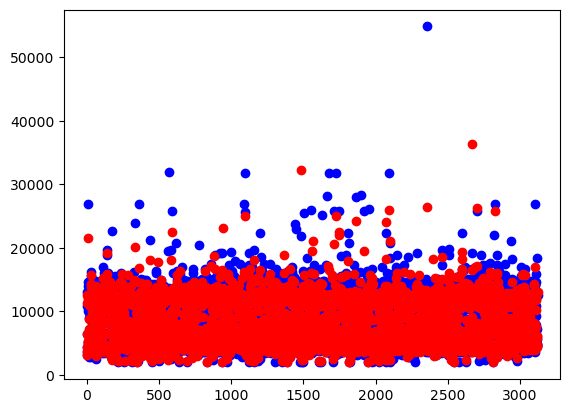

In [569]:
plt.scatter(range(len(y_test)),y_test,color = 'blue')
plt.scatter(range(len(y_test)),pred,color = 'red')

In [570]:
print(y_test.mean())
print(pred.mean())


8789.186359269932
8715.584


### trying stacking on xgb , random forest, gradient boosting

In [572]:
base_learners = [
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

meta_learner = Ridge(alpha=1.0, random_state=42)

In [573]:
from sklearn.ensemble import StackingRegressor

stack_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=False,
    n_jobs=-1)

In [574]:
stack_model.fit(x_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learni...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=Ridge(random_state=42), n_jobs=-1)

In [575]:
y_pred = stack_model.predict(x_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [576]:
print(mae)
print(rmse)

1389.8436649522564
2269.946809466389


### still there is no significant improvement

### lets try one hot encoding and log transform the price, for better performance

In [579]:
x['Dep_hour'] = np.where(x['Dep_hour']<=8,'early morning',np.where(x['Dep_hour']<=12,'morning',np.where(x['Dep_hour']<=19,'evening','night')))
x['arr_hour'] = np.where(x['arr_hour']<=8,'early morning',np.where(x['arr_hour']<=12,'morning',np.where(x['arr_hour']<=19,'evening','night')))
x['Duration_min'] = np.where(x['Duration_min']<1000,'short',np.where(x['Duration_min']<2000,'medium','long'))

y = np.log(y)

In [580]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [581]:
from sklearn.preprocessing import OneHotEncoder

ohc1 = OneHotEncoder(drop= 'first')


In [582]:
x_train_ohc = ohc1.fit_transform(x_train).toarray()
x_test_ohc = ohc1.transform(x_test).toarray()


In [583]:
print(x_train_ohc.shape)
print(x_test_ohc.shape)

(6340, 35)
(3123, 35)


In [584]:
 def performance(reg,x_train,y_train,x_test,y_test):
     reg.fit(x_train,y_train)
     y_pred = reg.predict(x_test)
     mse = mean_squared_error(np.expm1(y_pred),np.expm1(y_test))
     mae = mean_absolute_error(np.expm1(y_pred),np.expm1(y_test))
     return mse,mae 


final_rmse = []
final_mae= []
for reg in algo.values():
    mse,mae = performance(reg,x_train_norm,y_train,x_test_norm,y_test)
    final_rmse.append(np.sqrt(mse))
    final_mae.append(mae)
    



In [680]:
perf['rsme_ohc'] = final_rmse
perf['mae_ohc'] = final_mae

In [682]:
perf

,Algo,root_mean_sqrd_error,mean_abs_error,rsme_mm,mae_mm,rsme_norm,mae_norm,rsme_ohc,mae_ohc
0,ln,3270.287704,2322.632892,3270.287704,2322.632892,3896.742545,2439.450661,359989.020646,8746.366498
1,rd,3270.303537,2322.646137,3270.558282,2322.904838,3584.316005,2630.394564,3562.973786,2481.931460
2,ls,3270.283452,2322.497440,3270.269497,2322.147373,3419.097089,2510.944083,4625.467863,3660.193728
3,svr,4109.036268,3111.970969,4443.066906,3515.729086,4551.347247,3638.930340,3419.644112,2320.638569
4,dt,3008.254871,1638.338778,3044.369920,1641.867490,3614.192474,1939.886862,3378.480299,1865.993920
5,rf,2454.820982,1438.301279,2461.250998,1439.636802,2787.829925,1625.317344,2771.415807,1600.581254
6,ad,3361.780964,2685.079573,3421.487064,2781.392933,4045.640230,3404.946302,3201.243849,2261.011928
7,gb,2482.488764,1602.099344,2482.515620,1602.182112,2817.929168,1863.370362,2855.949655,1825.675837
8,xgb,2316.511814,1379.254945,2316.511814,1379.254945,2733.576058,1591.846605,2657.984710,1547.360551
